In [291]:
import sys
import os
from json_dict import JsonDict
sys.path.append(os.path.abspath(".."))
import main2
import pandas as pd
from rdkit.Chem.Draw import SimilarityMaps
from rdkit import Chem
import torch
import numpy as np
import matplotlib.pyplot as plt


In [292]:
config_file_size="train_size_6.json"
train_data="../data/train_data_size_smiles_rem_z_average_cutoff_500_dispersity_cutoff_0.3_cutoff_size_disp_300_cutoff_group_size_3_cutoff_min_conc_3_valid_threshold_0.2_valid_threshold_0.2.csv"
test_data ="../data/train_data_size_removed_smiles_z_average_cutoff_500_dispersity_cutoff_0.3_cutoff_size_disp_300_cutoff_group_size_3_cutoff_min_conc_3_valid_threshold_0.2_valid_threshold_0.2.csv"
config_file_validity="train_valid_6.json"

c_min=0
c_max=30
deg_min=10
deg_max=300

pixel=10000

In [315]:
pixerl_1d=np.sqrt(pixel)
c_delt=(c_max-c_min)/pixerl_1d
deg_delt=(deg_max-deg_min)/(pixerl_1d-1)

c_delt =(c_max-c_min)/(pixerl_1d-1)

concentrations = np.arange(0,30,0.1)
poly_deg = np.arange(deg_min,deg_max+deg_delt,deg_delt)
concentrations = np.arange(c_min,c_max+c_delt,c_delt)

In [351]:
train_df = pd.read_csv(train_data)
test_df = pd.read_csv(test_data)
config = JsonDict(config_file_size)
model = main2.load_model(config.getsubdict("model"))


54
try loading model from /home/julian/.smartchem/np_model_1596610350/np_model_1596610350.pth
load successful


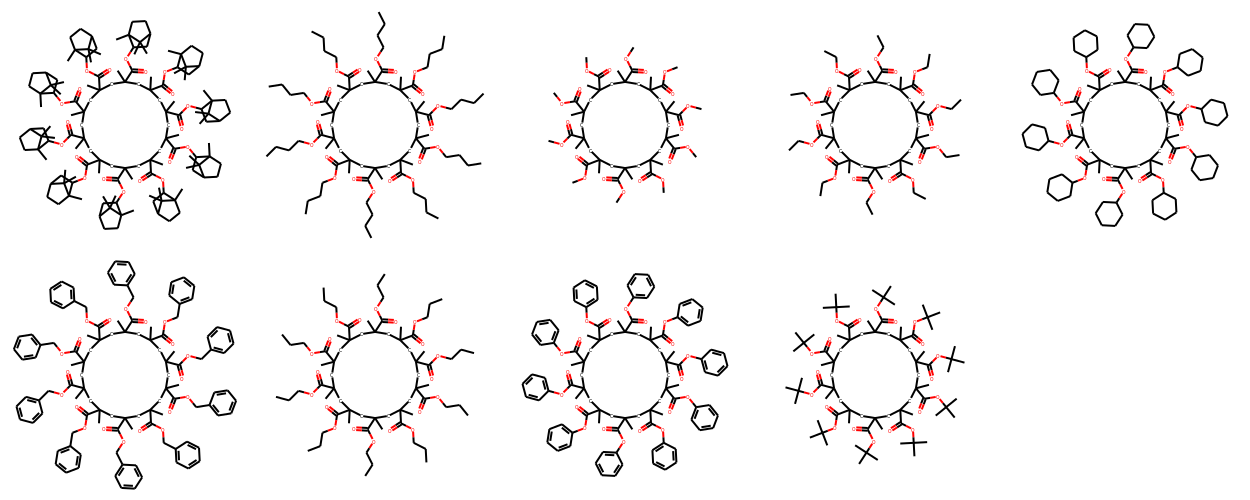

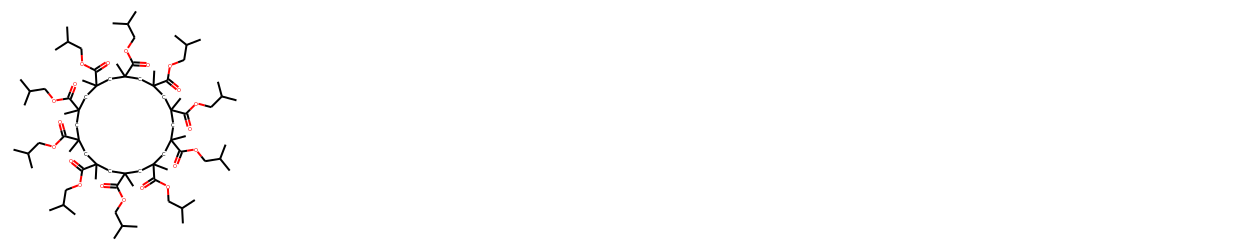

In [352]:
all_smiles = list(train_df["circular_smiles_10"].unique())
display(Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(smiles) for smiles in list(train_df["circular_smiles_10"].unique())],molsPerRow=5,subImgSize=(250,250)))

all_smiles.extend(list(test_df["circular_smiles_10"].unique()))
mols=[Chem.MolFromSmiles(smiles) for smiles in all_smiles]
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(smiles) for smiles in list(test_df["circular_smiles_10"].unique())],molsPerRow=5,subImgSize=(250,250))

In [353]:
if "level_0" in test_df.columns:
    test_df.drop("level_0",axis=1,inplace=True)
true2=test_df["z_average"].values
test_df= main2.predict(model,test_df)
pred2= test_df["predicted_z_average"]

In [354]:
mask=(test_df["dp"]==test_df["dp"].max()).values
v=test_df["dp"].max()
print(v)
if "level_0" in test_df.columns:
    test_df.drop("level_0",axis=1,inplace=True)
v=0

175.81119284378124


In [365]:
v=1000

1000 data 240/240
load data 240/240
14.873734642755847 900


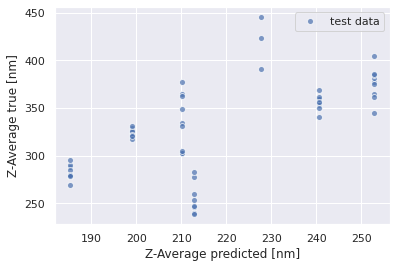

load data 240/240
14.553931681812626 800


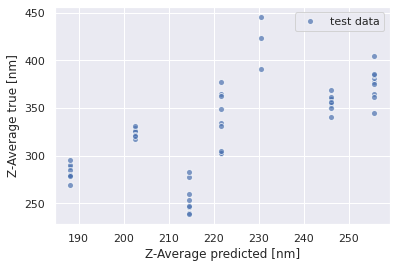

load data 240/240
14.198214661081025 700


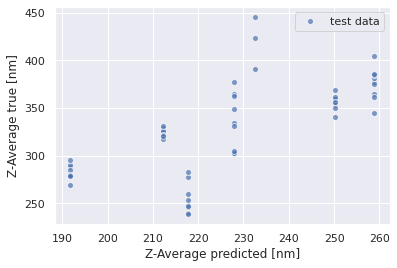

load data 240/240
13.818110399367844 600


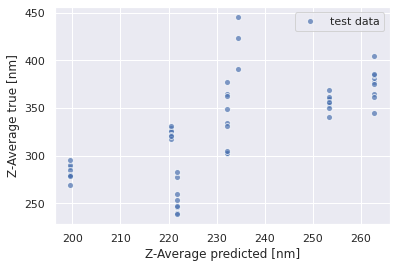

load data 240/240
13.456397266695303 500


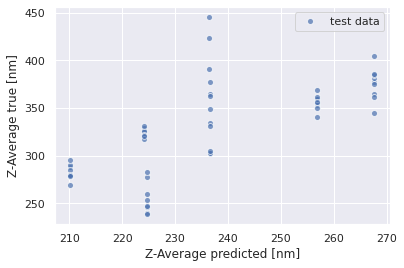

load data 240/240
13.38773140334113 400


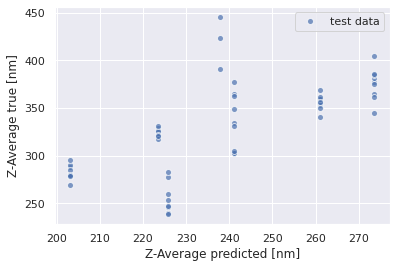

load data 240/240
12.642392422259311 300


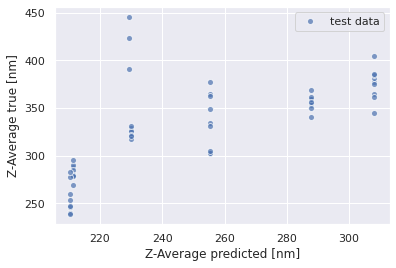

load data 240/240
12.355368775529842 200


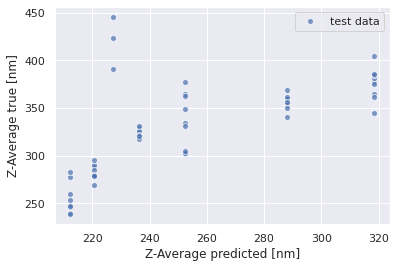

load data 240/240
14.17886672964333 100


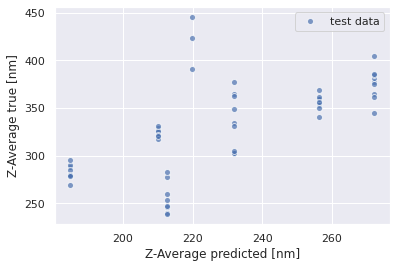

load data 240/240
12.461701551068867 190


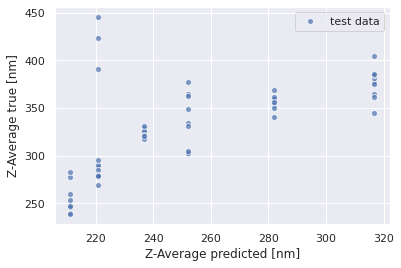

load data 240/240
12.683525884275761 180


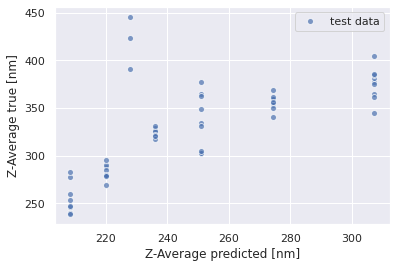

load data 240/240
12.476057255116018 189


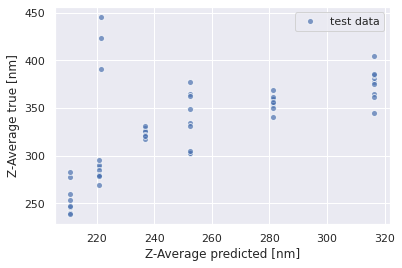

load data 240/240
12.489979133577073 188


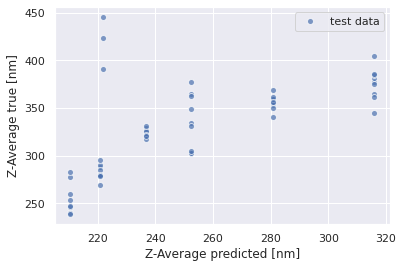

load data 240/240
12.47745955874065 188.9


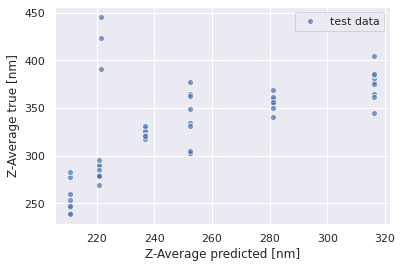

load data 240/240
12.47885725800756 188.8


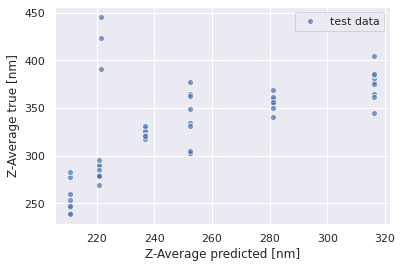

In [366]:
test_df.loc[mask,"dp"]=v
true2=test_df["z_average"].values
if "level_0" in test_df.columns:
    test_df.drop("level_0",axis=1,inplace=True)
test_df= main2.predict(model,test_df)
pred2= test_df["predicted_z_average"]

me = 100*np.abs((true2-pred2)/true2).mean()
print(v)
for k in [100,10,1,0.1]:
    last_me=me+0.1
    while last_me>me:
        if "level_0" in test_df.columns:
            test_df.drop("level_0",axis=1,inplace=True)
        v=v-k
        test_df.loc[mask,"dp"]=v
        true2=test_df["z_average"].values
        test_df= main2.predict(model,test_df)
        pred2= test_df["predicted_z_average"]
        last_me=me
        me = 100*np.abs((true2-pred2)/true2).mean()
        print()
        print(me,v)
        plt.plot(pred2[mask],true2[mask],"o",alpha=0.7, markeredgecolor='w',label="test data")
        plt.ylabel("Z-Average true [nm]")
        plt.xlabel("Z-Average predicted [nm]")
        plt.legend()
        plt.show()
        plt.close()
    v=v+k
    test_df.loc[mask,"dp"]=v

In [162]:
true1=train_df["z_average"].values
train_df= main2.predict(model,train_df)
pred1= train_df["predicted_z_average"]

In [378]:
print("",100*np.abs((true1-pred1)/true1).mean())
print("",100*np.abs((true2-pred2)/true2).mean())
print("",100*np.abs((true2[~mask]-pred2[~mask])/true2[~mask]).mean())

 4.126985818396526
 12.47885725800756
 9.396210509792253


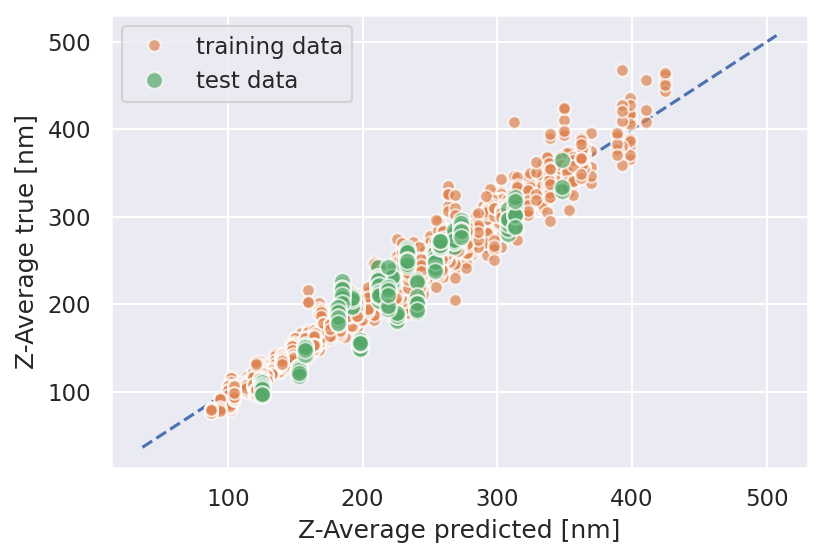

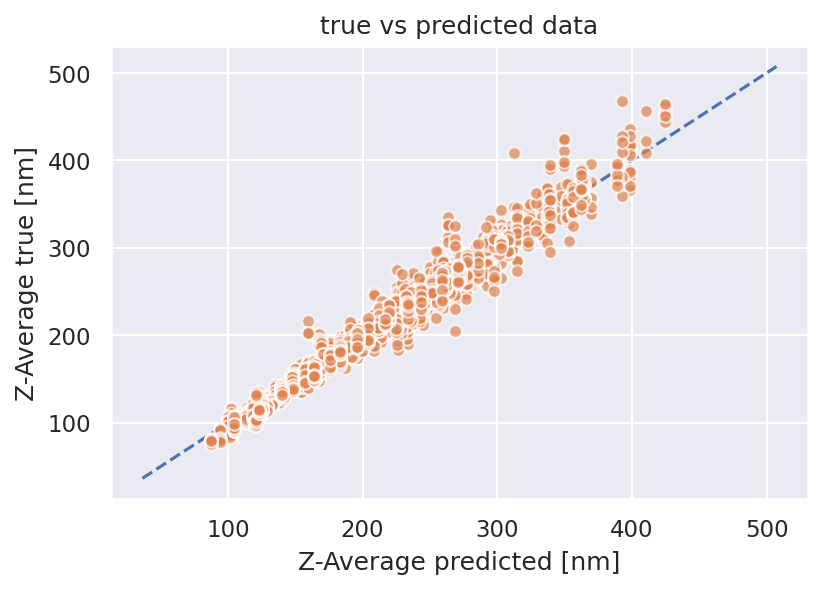

In [379]:
_min = min(true1.min(),true2.min())
_max = max(true1.max(),true2.max())
_min,_max = _min - 0.1*(_max-_min) , _max + 0.1*(_max-_min)
plt.figure(dpi=150)

plt.plot([_min,_max],[_min,_max],"--")

#for i in true1:
#    plt.plot([i,i],[_min,_max],"r--")
#for i in pred1:
#    plt.plot([_min,_max],[i,i],"r--")
#mask=(test_df["dp"]<test_df["dp"].max()).values
plt.plot(pred1,true1,"o",alpha=0.7, markeredgecolor='w',label="training data")
plt.plot(pred2[~mask],true2[~mask],"o",alpha=0.7, markeredgecolor='w',label="test data",markersize=8)
plt.ylabel("Z-Average true [nm]")
plt.xlabel("Z-Average predicted [nm]")
plt.legend()
plt.show()
plt.close()

plt.figure(dpi=150)

plt.plot([_min,_max],[_min,_max],"--")

#for i in true1:
#    plt.plot([i,i],[_min,_max],"r--")
#for i in pred1:
#    plt.plot([_min,_max],[i,i],"r--")
    
plt.plot(pred1,true1,"o",alpha=0.7, markeredgecolor='w',label="training data")
plt.ylabel("Z-Average true [nm]")
plt.xlabel("Z-Average predicted [nm]")
plt.title("true vs predicted data")
plt.show()
plt.close()

In [115]:
test_df["error"] = np.abs(test_df["predicted_z_average"]-test_df["z_average"])

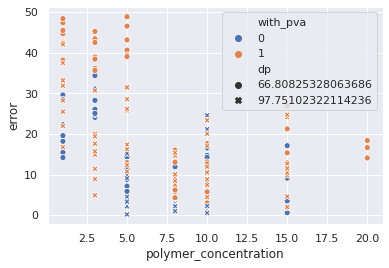

In [141]:
test_df.sort_values("error",ascending=False)
import seaborn as sls
sls.scatterplot(y="error",x="polymer_concentration",data=test_df[test_df["dp"]<test_df["dp"].max()],style="dp",hue="with_pva",legend="full")
plt.legend()

In [139]:
test_df.columns

Index(['index', 'measurment_data', 'sample', 'temperature', 'z_average',
       'dispersity', 'mean_count_rate', 'volume_mean', 'intensity_mean',
       'number_mean', 'file', 'np_formulation', 'substance_code',
       'polymer_class', 'polymer', 'smiles_monomer', 'smiles_ru', 'mn', 'pdi',
       'mn_method', 'tg', 'date', 'additive', 'polymer_concentration',
       'mass_ru', 'circular_smiles_10', 'dp', 'valid', 'roll_valid',
       'with_pva', 'predicted_z_average', 'error'],
      dtype='object')

458
1.0


<Figure size 432x288 with 0 Axes>

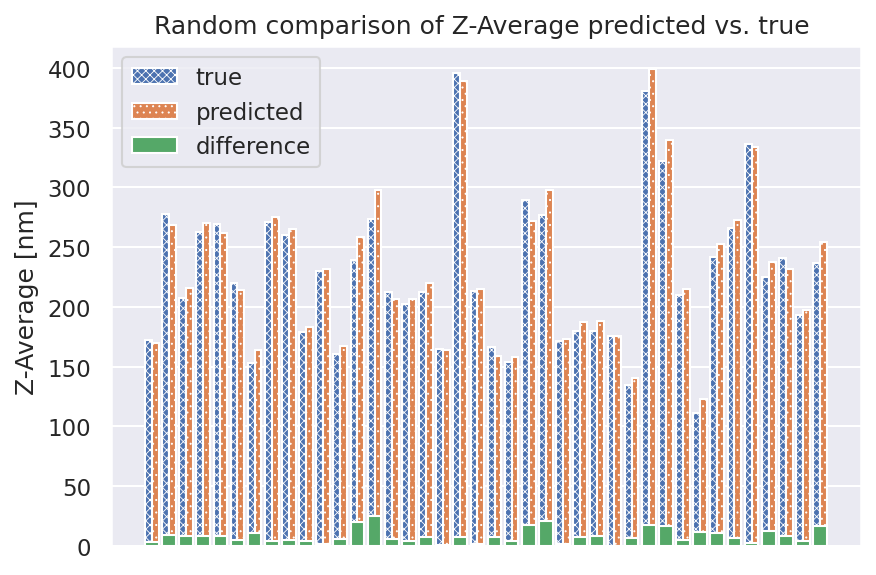

In [106]:
plt.figure()
fig,a = plt.subplots(dpi=150)
idx  = np.arange(len(true1))
seed = np.random.randint(1000)
seed=458
print(seed)
np.random.seed(seed)
idx=np.random.choice(idx,size=40)
width=0.4
prehw=plt.rcParams['hatch.linewidth']
print(prehw)
plt.rcParams['hatch.linewidth']=0.4
a.bar(np.arange(len(idx)) - width/2,true1[idx],width,label="true", hatch="xxxxxx")
a.bar(np.arange(len(idx)) + width/2,pred1[idx],width,label="predicted", hatch="....")
a.bar(np.arange(len(idx)),np.abs(true1[idx]-pred1[idx]),label="difference")
plt.ylabel("Z-Average [nm]")
plt.title("Random comparison of Z-Average predicted vs. true ")
a.axes.xaxis.set_visible(False)
plt.legend()
plt.tight_layout()
plt.show()
plt.close()
plt.rcParams['hatch.linewidth']=prehw

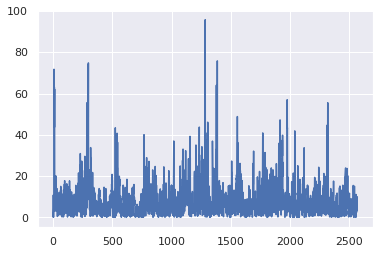

In [107]:
plt.plot(np.abs(pred1-true1))

In [108]:
full_df=pd.DataFrame(columns=config.get("model","additional_input_names"))
df_data=[]
for smiles in all_smiles:
    for conc in concentrations:
        for deg in poly_deg:
            for wpva in [0,1]:
                full_df = df_data.append({
                    'dp' : deg,
                    'polymer_concentration' : conc,
                    "pdi":1,
                    "with_pva":wpva,
                    'circular_smiles_10':smiles
                })
full_df = pd.DataFrame(df_data)
full_df

dp  polymer_concentration  pdi  with_pva  \
0        10.000000                    0.0    1         0   
1        10.000000                    0.0    1         1   
2        12.929293                    0.0    1         0   
3        12.929293                    0.0    1         1   
4        15.858586                    0.0    1         0   
...            ...                    ...  ...       ...   
199995  294.141414                   30.0    1         1   
199996  297.070707                   30.0    1         0   
199997  297.070707                   30.0    1         1   
199998  300.000000                   30.0    1         0   
199999  300.000000                   30.0    1         1   

                                       circular_smiles_10  
0       C3[C](C)(C(=O)OC1CC2CCC1(C)C2(C)C)[CH2][C](C)(...  
1       C3[C](C)(C(=O)OC1CC2CCC1(C)C2(C)C)[CH2][C](C)(...  
2       C3[C](C)(C(=O)OC1CC2CCC1(C)C2(C)C)[CH2][C](C)(...  
3       C3[C](C)(C(=O)OC1CC2CCC1(C)C2(C)C)[CH2][C](C)(...  
4       C3[C](C)(C(=O)OC1CC2CCC1(C)C2(C)C)[CH2][C](C)(...  
...                                                   ...  
199995  C3[C](C)(C(=O)OCC(C)C)[CH2][C](C)(C(=O)OCC(C)C...  
199996  C3[C](C)(C(=O)OCC(C)C)[CH2][C](C)(C(=O)OCC(C)C...  
199997  C3[C](C)(C(=O)OCC(C)C)[CH2][C](C)(C(=O)OCC(C)C...  
199998  C3[C](C)(C(=O)OCC(C)C)[CH2][C](C)(C(=O)OCC(C)C...  
199999  C3[C](C)(C(=O)OCC(C)C)[CH2][C](C)(C(=O)OCC(C)C...  

[200000 rows x 5 columns]

In [109]:
pred_df = main2.predict(model,full_df)

In [110]:
import rdkit
import cairosvg
from PIL import Image
import os
def to_rdk_transparent_png(mol ):
    dr = rdkit.Chem.Draw.rdMolDraw2D.MolDraw2DSVG( 200, 200 )
    #dr.SetFontSize( 0.27 )
    op = dr.drawOptions()
    #for i in range( mol.GetNumAtoms() ) :
    #    op.atomLabels[i]=mol.GetAtomWithIdx(i).GetSymbol()+str((i+1))
    rdkit.Chem.AllChem.Compute2DCoords( mol )
    dr.DrawMolecule( mol )
    dr.FinishDrawing()
    
    svg = dr.GetDrawingText()
    svg =  svg.replace("<rect style='opacity:1.0;fill:#","<rect style='opacity:0.0;fill:#")
    
    cairosvg.svg2png(svg,write_to ="temp.png")
    img = Image.open("temp.png")
    return img

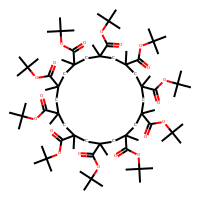

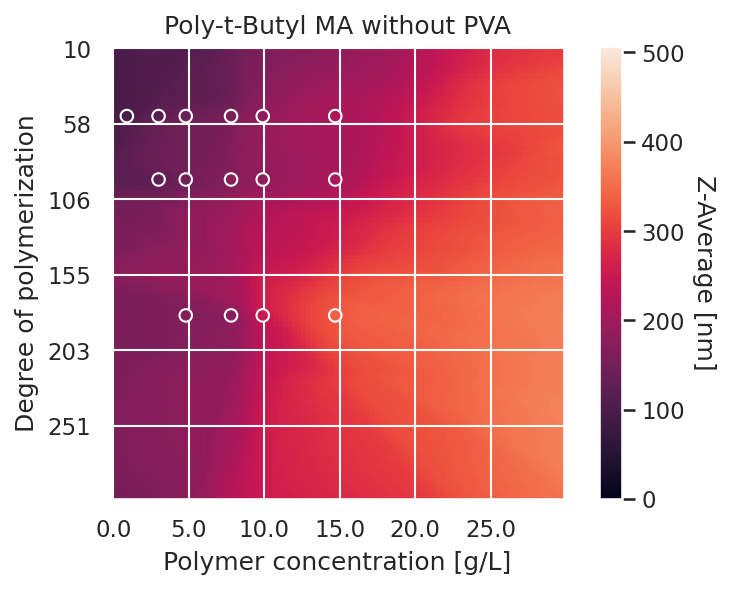

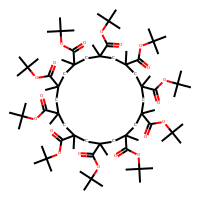

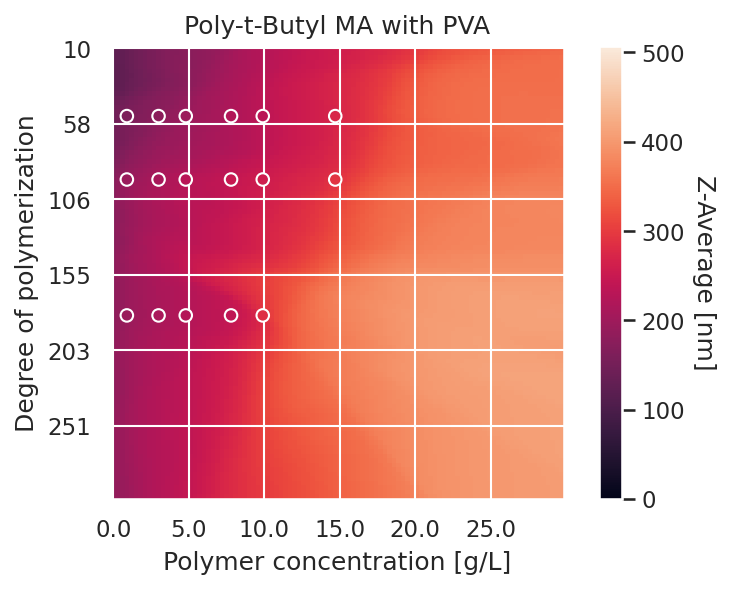

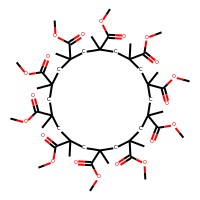

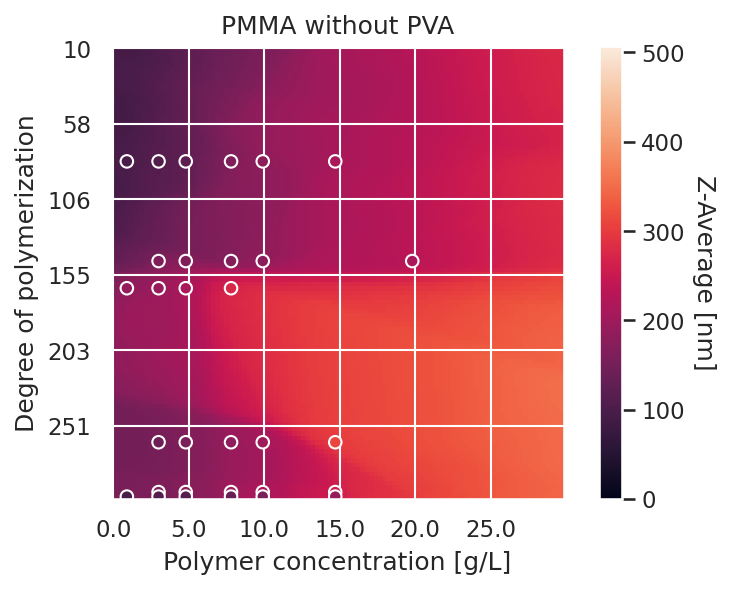

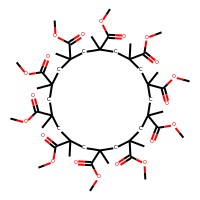

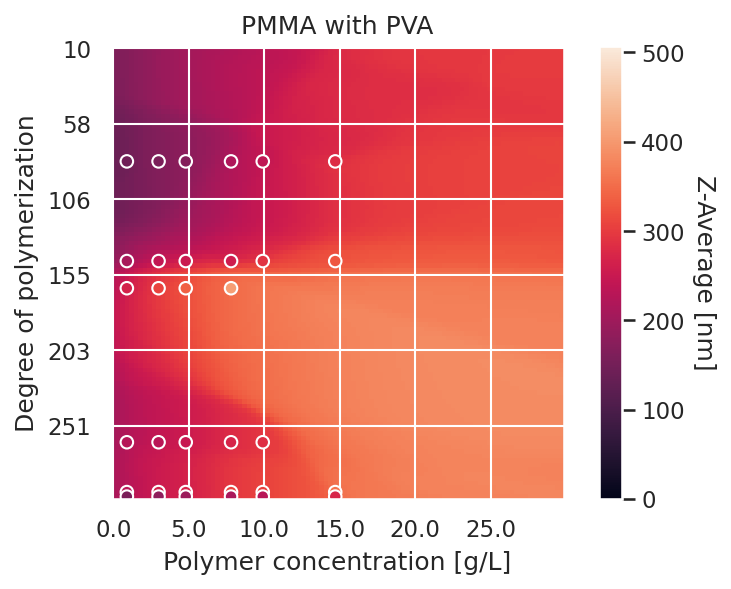

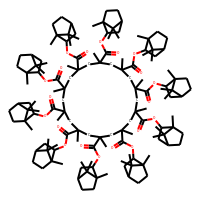

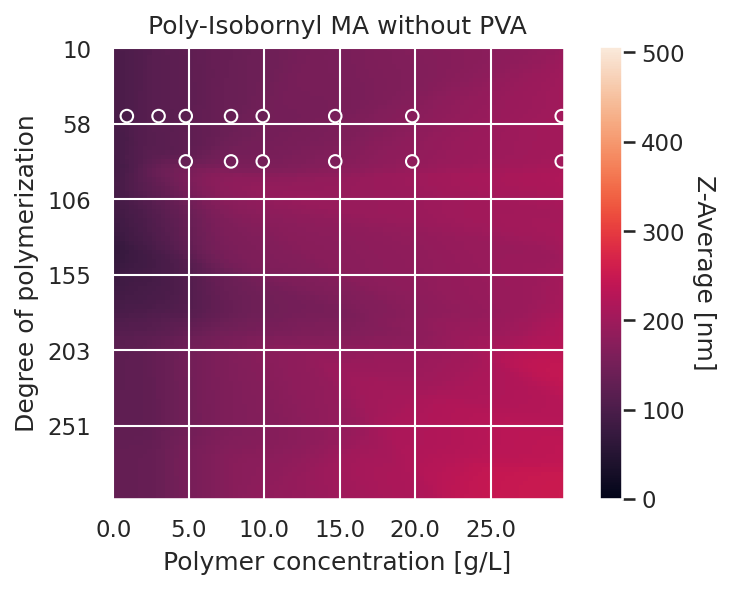

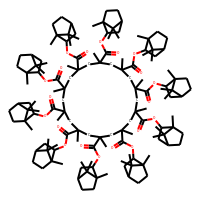

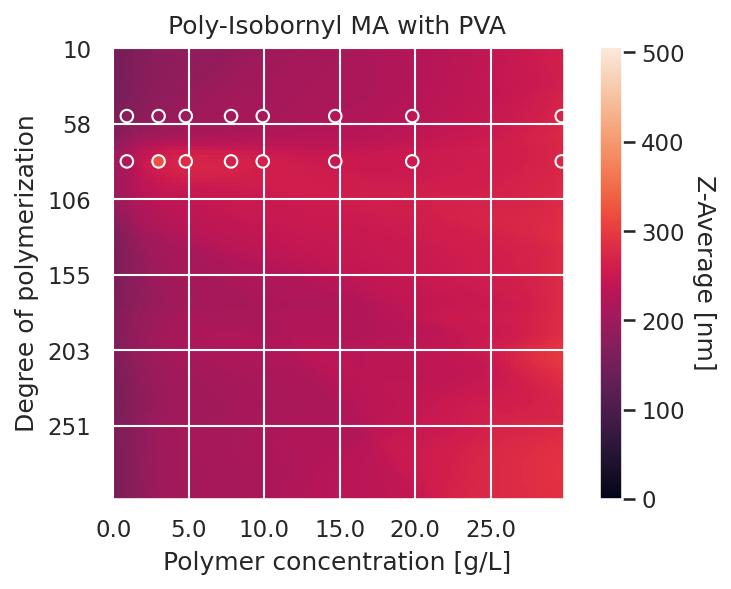

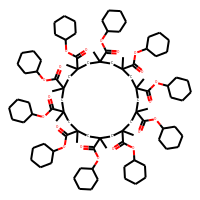

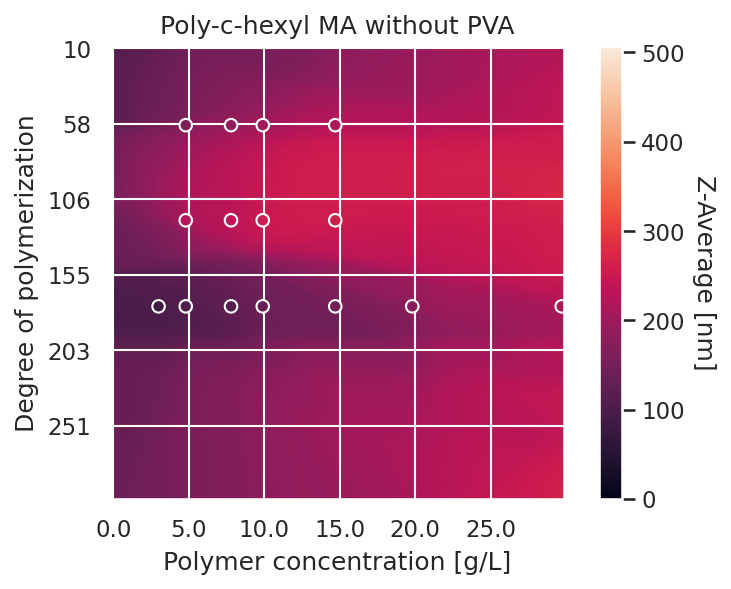

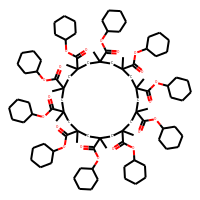

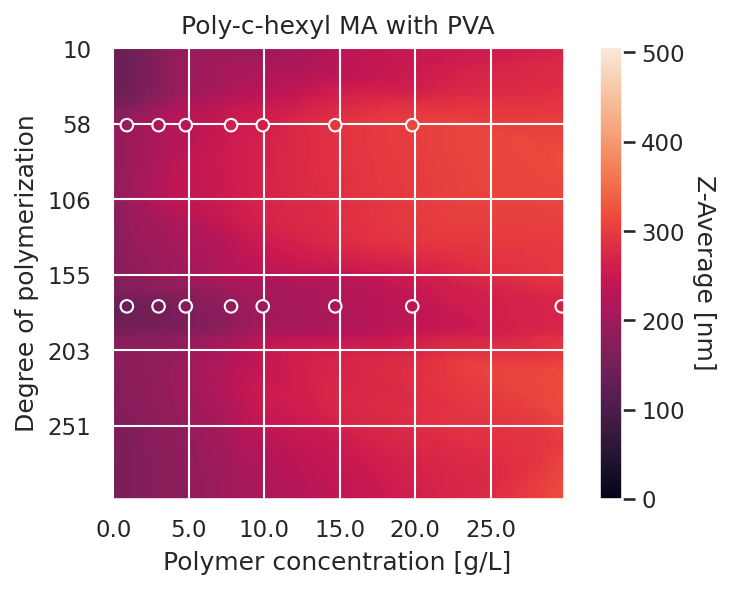

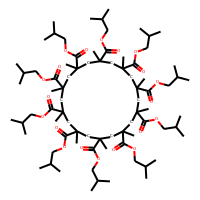

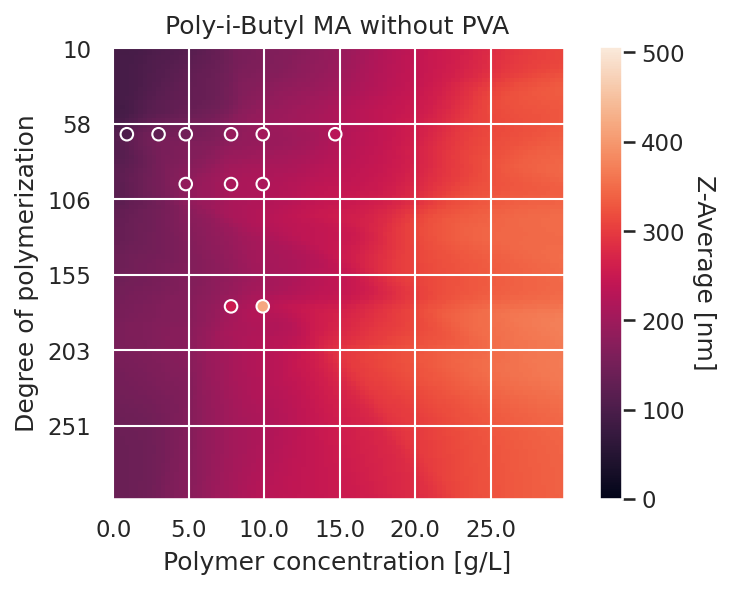

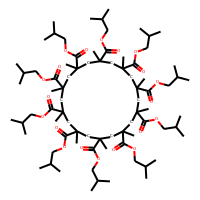

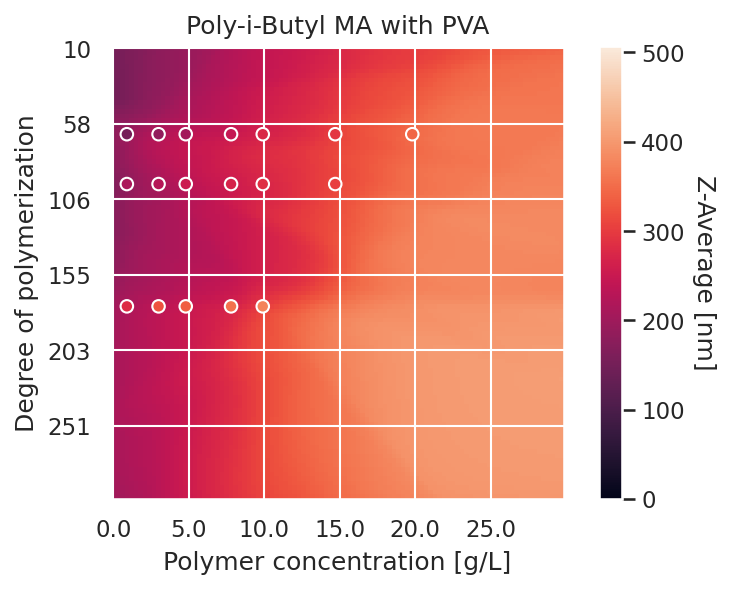

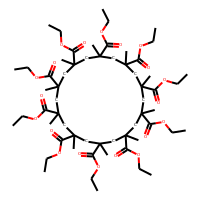

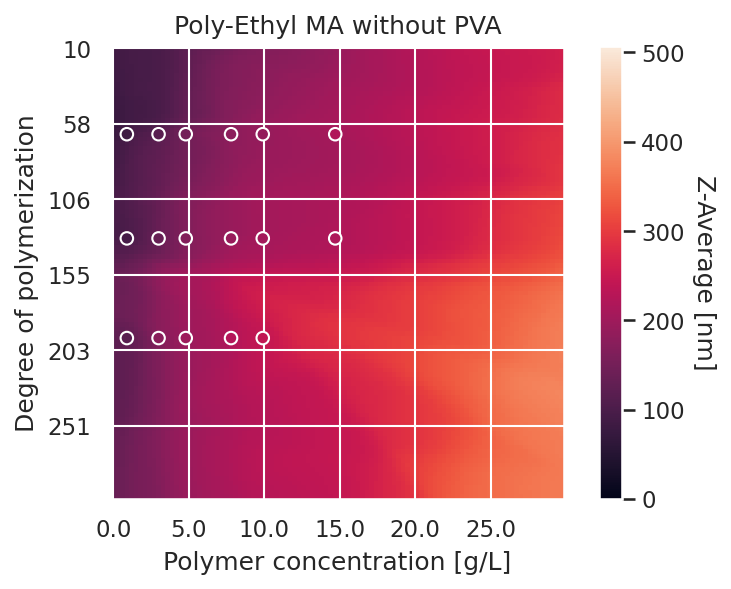

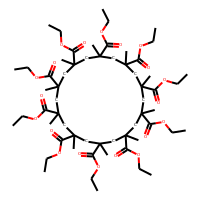

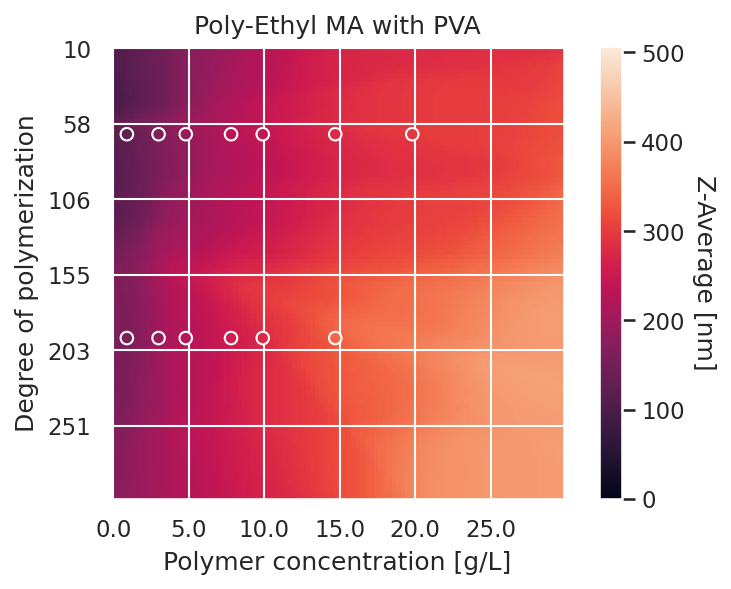

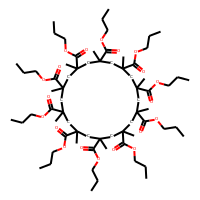

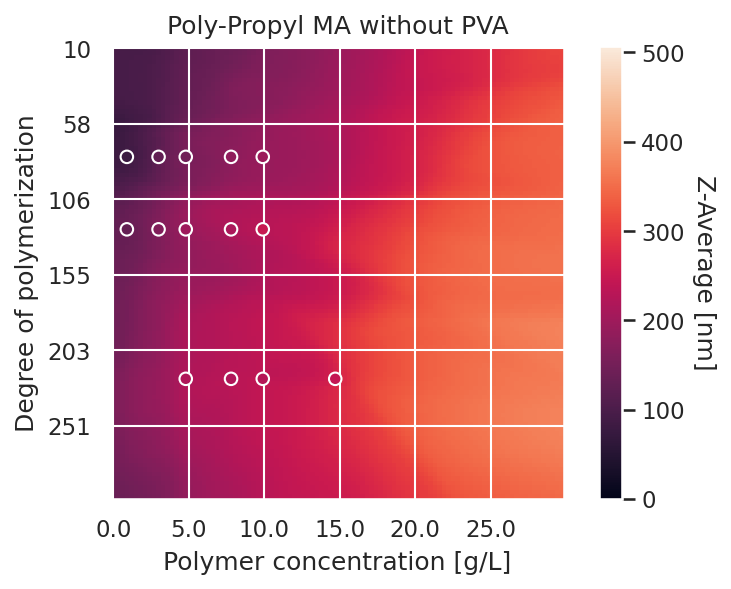

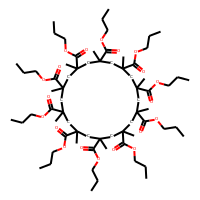

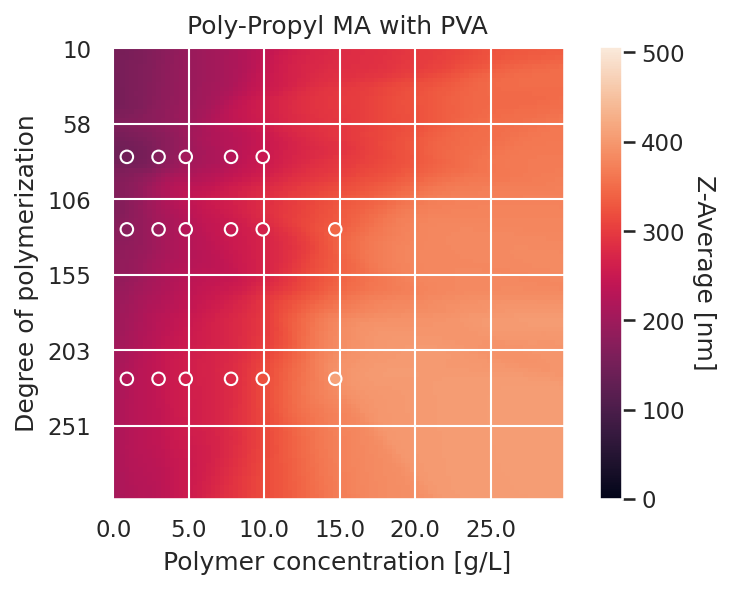

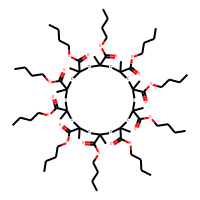

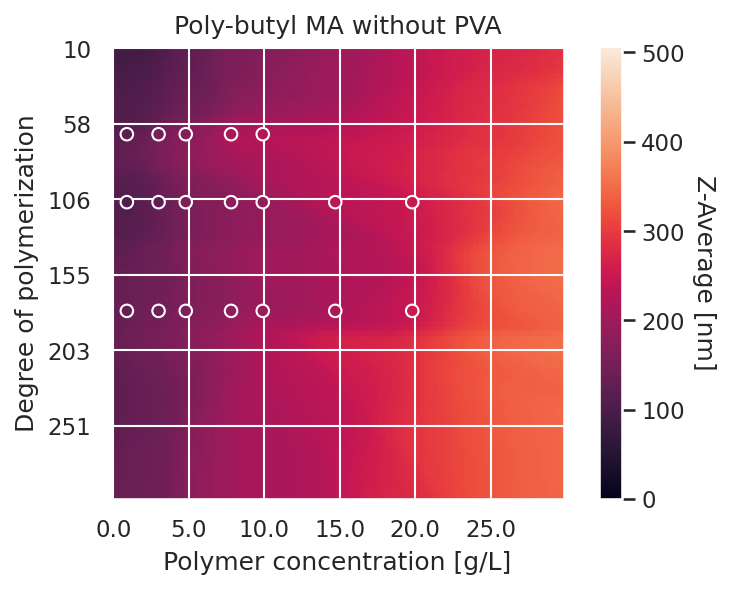

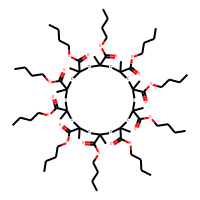

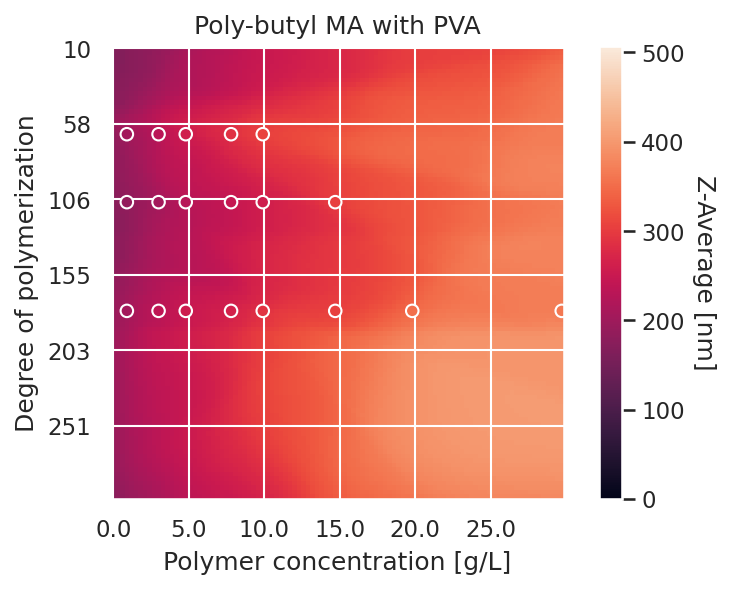

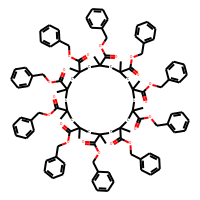

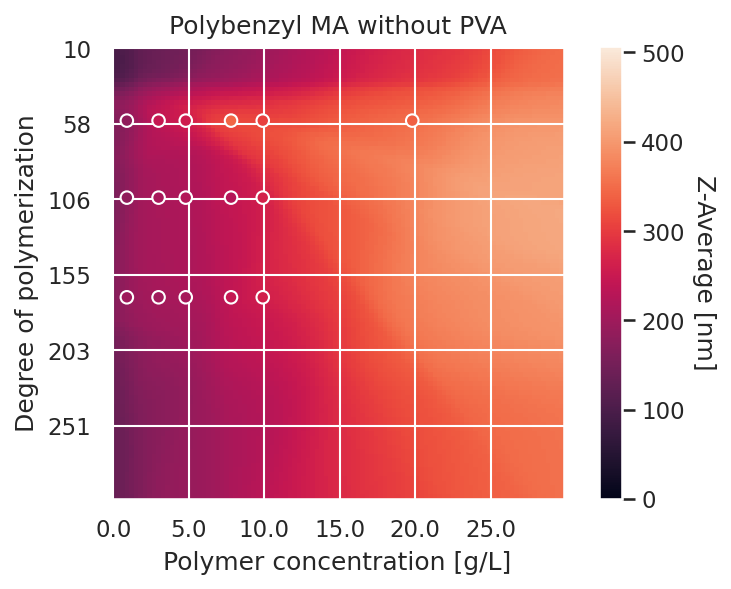

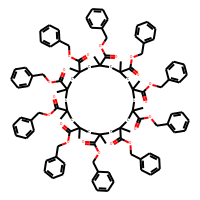

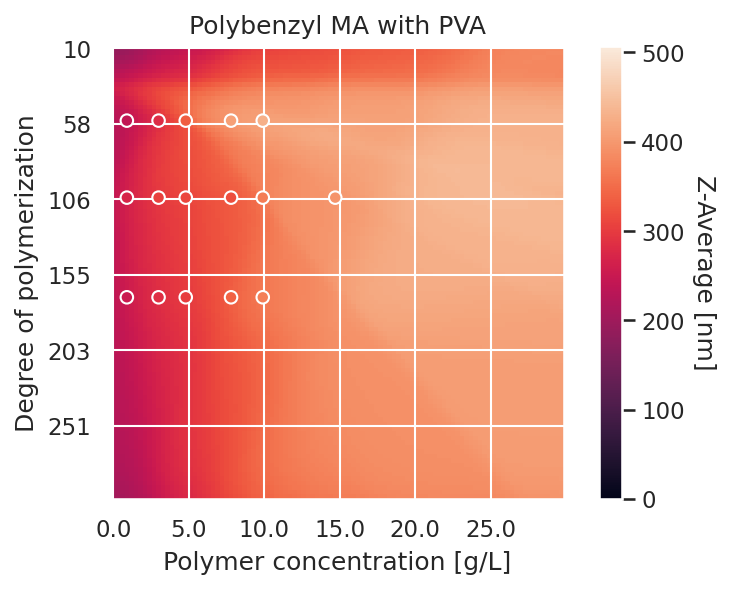

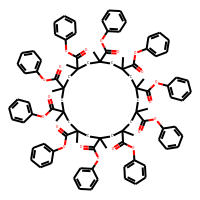

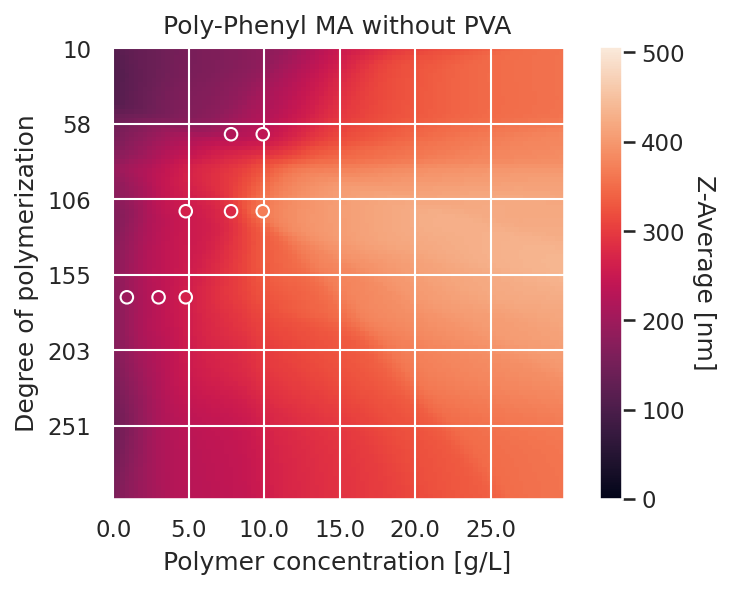

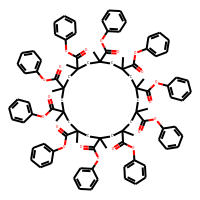

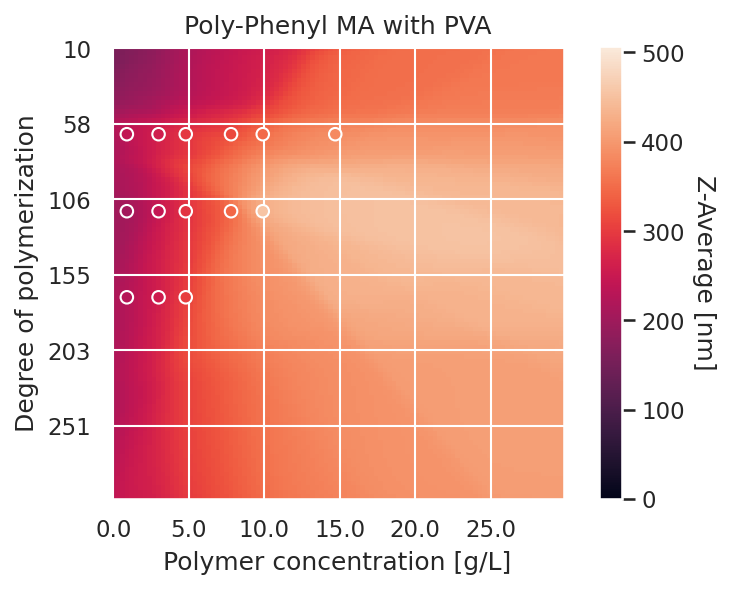

In [111]:
z_max=train_df["z_average"].max()
z_max=_max
z_min=0#train_df["z_average"].min()
for (smiles,with_pva), smiles_df in pred_df.groupby(["circular_smiles_10","with_pva"]):
    sd = train_df[(train_df["circular_smiles_10"]==smiles)]
    if len(sd.dp.unique()) >0:
        pass
    else:
        sd = test_df[(test_df["circular_smiles_10"]==smiles)]
    
    plt.figure(dpi=150)
    predicted_z_average = smiles_df["predicted_z_average"].values.astype(float)
    #print(predicted_z_average)
    XY_pred = (predicted_z_average.reshape(len(concentrations),-1)).T
    plt.imshow(XY_pred,
                    #extent=[c_min,c_max,30,0],
         #            yticklabels=yticks
                    )
    plt.clim(z_min,z_max) 
    
    
    sd = sd[sd["with_pva"]==with_pva]
    #sd = sd[sd["with_pva"]==with_pva]
    dps=[]
    poly_conc=[]
    z_average=[]
    for (dp,polymer_concentration), point_group in sd.groupby(["dp","polymer_concentration"]):
        dps.append(dp)
        poly_conc.append(polymer_concentration)
        z_average.append(point_group["z_average"].mean())
    new_dps=[np.argmin(np.abs(poly_deg-deg)) for deg in dps]
    new_conc=[np.argmin(np.abs(concentrations-conc)) for conc in poly_conc]
    
    k=7
    old_xticks = plt.xticks()
    plt.xticks(np.linspace(0,old_xticks[0].max(),k), np.round(np.linspace(concentrations.min(),concentrations.max(),k)))
    
    old_yticks = plt.yticks()
    plt.yticks(np.linspace(0,len(poly_deg),k), np.linspace(poly_deg.min(),poly_deg.max(),k,dtype=int))
    
    plt.scatter(new_conc,new_dps,c=z_average,edgecolors="w")
    plt.clim(z_min,z_max) 
    
    plt.xlabel("Polymer concentration [g/L]")
    plt.ylabel("Degree of polymerization")
 
    
    plt.title("{} {} PVA".format(sd.polymer.unique()[0], "with" if with_pva else "without",))
    display(to_rdk_transparent_png(Chem.MolFromSmiles(smiles)))
    
    cbar = plt.colorbar()

    cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.set_ylabel('Z-Average [nm]', rotation=270)
    plt.show()
    plt.close()
    display()
    
    #xypred = prednp.reshape((d_res,c_res))

In [112]:
config = JsonDict(config_file_validity)
model = main.load_model(config.getsubdict("model"))
pred_df = main.predict(model,pred_df)

NameError: name 'main' is not defined

In [ ]:
z_max=train_df["z_average"].max()
z_max=600
z_min=train_df["z_average"].min()
for (smiles,with_pva), smiles_df in pred_df.groupby(["circular_smiles_10","with_pva"]):
    predicted_z_average = smiles_df["predicted_roll_valid"].values.astype(float)
    #print(predicted_z_average)
    XY_pred = (predicted_z_average.reshape(len(concentrations),-1)).T
    plt.imshow(XY_pred,
                    #extent=[c_min,c_max,30,0],
         #            yticklabels=yticks
                    )
    plt.clim(0,1) 
    
    sd = train_df[(train_df["circular_smiles_10"]==smiles)]
    sd = sd[sd["with_pva"]==with_pva]
    #dps=[]
    #poly_conc=[]
    #z_average=[]
    #for (dp,polymer_concentration), point_group in sd.groupby(["dp","polymer_concentration"]):
    #    dps.append(dp)
    #    poly_conc.append(polymer_concentration)
    #    z_average.append(point_group["z_average"].mean())
    #new_dps=[np.argmin(np.abs(poly_deg-deg)) for deg in dps]
    #new_conc=[np.argmin(np.abs(concentrations-conc)) for conc in poly_conc]
    #plt.scatter(new_conc,new_dps,c=z_average,edgecolors="w")
    #plt.clim(0,z_max) 
    
    print(with_pva)
    display(Chem.MolFromSmiles(smiles))
    
    plt.colorbar()
    plt.show()
    plt.close()
    
    #xypred = prednp.reshape((d_res,c_res))

0


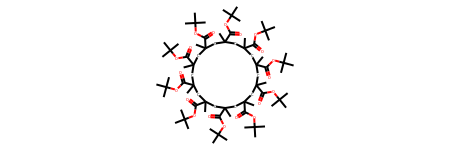

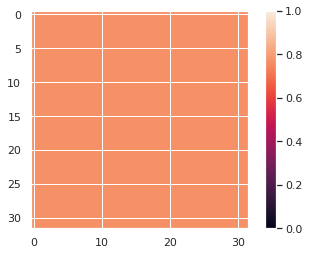

1


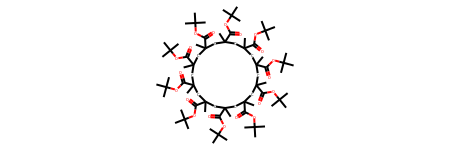

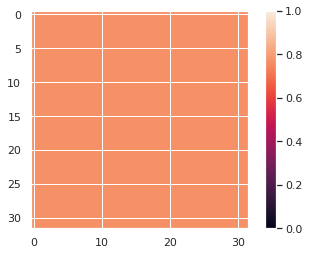

0


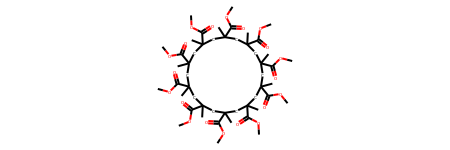

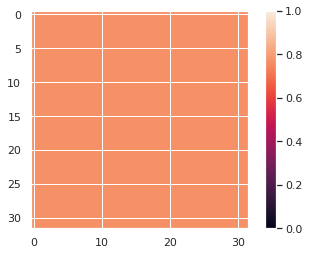

1


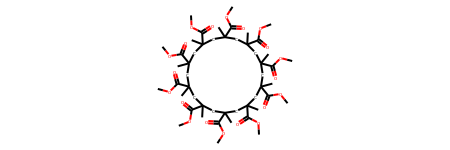

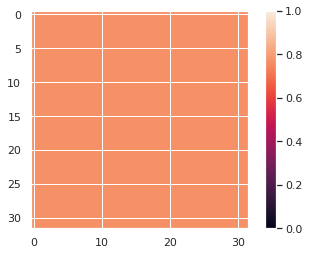

0


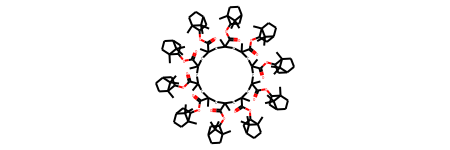

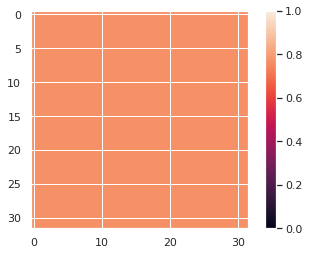

1


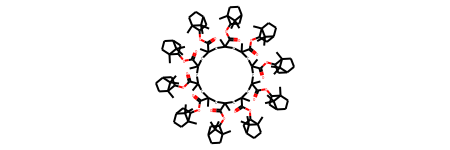

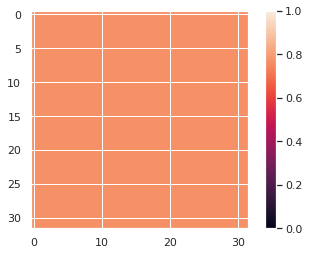

0


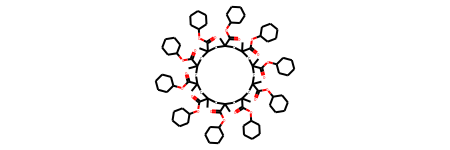

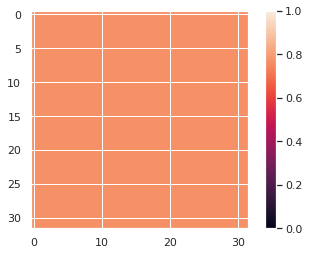

1


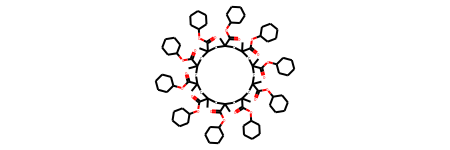

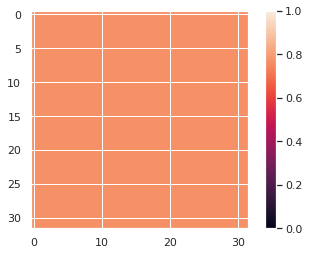

0


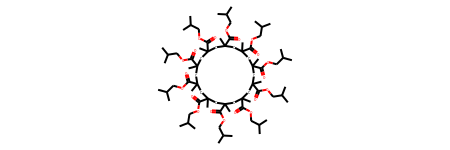

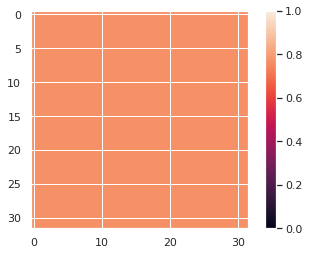

1


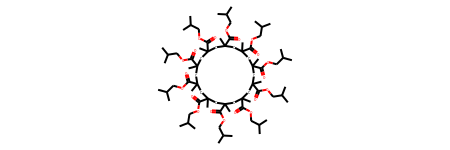

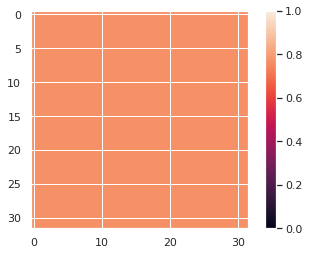

0


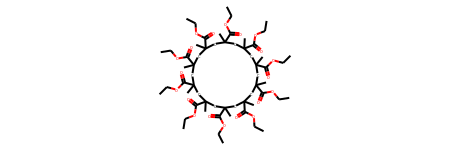

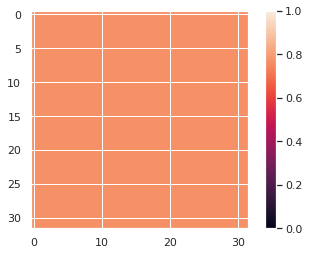

1


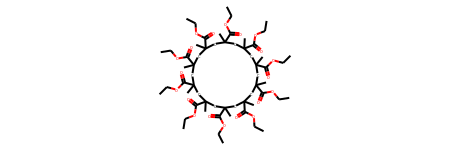

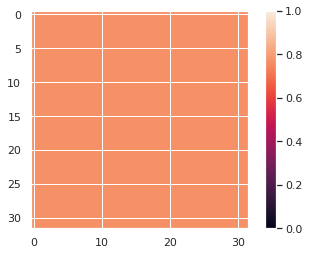

0


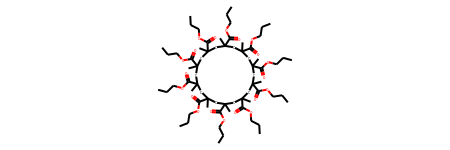

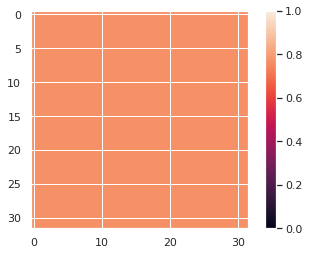

1


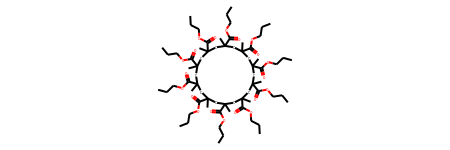

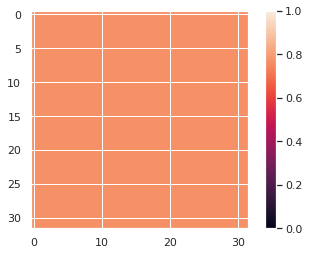

0


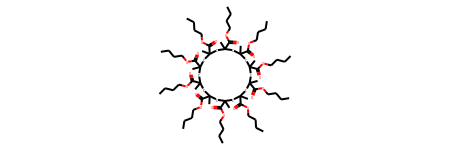

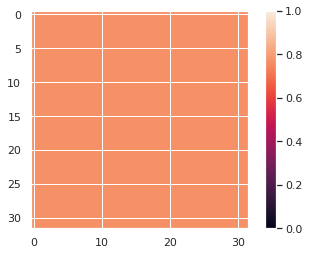

1


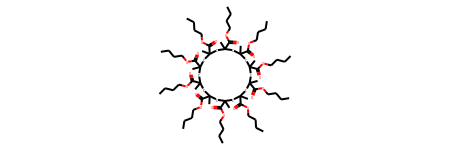

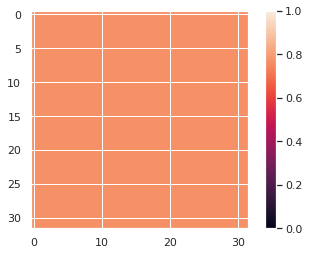

0


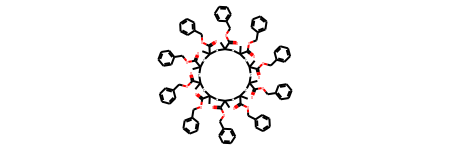

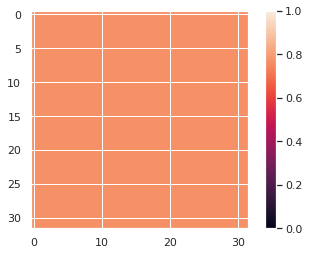

1


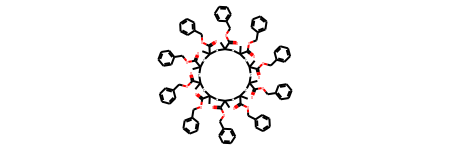

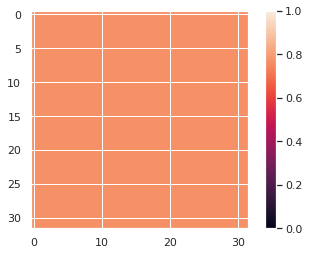

0


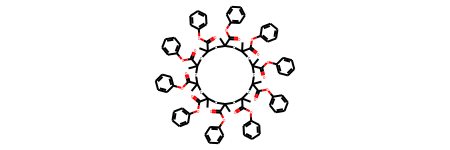

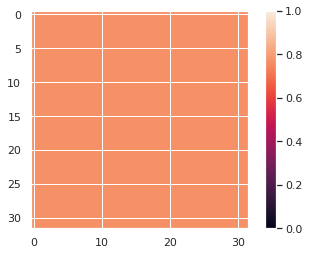

1


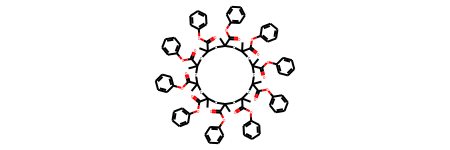

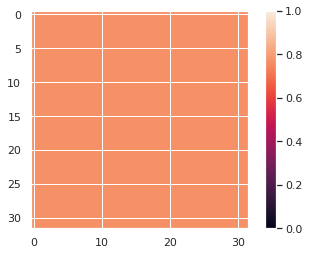

In [64]:
z_max=train_df["z_average"].max()
z_max=600
z_min=train_df["z_average"].min()
for (smiles,with_pva), smiles_df in pred_df.groupby(["circular_smiles_10","with_pva"]):
    predicted_z_average = smiles_df["predicted_roll_valid"].values.astype(float)
    #print(predicted_z_average)
    XY_pred = (predicted_z_average.reshape(len(concentrations),-1)).T
    plt.imshow(XY_pred,
                    #extent=[c_min,c_max,30,0],
         #            yticklabels=yticks
                    )
    plt.clim(0,1) 
    
    sd = train_df[(train_df["circular_smiles_10"]==smiles)]
    sd = sd[sd["with_pva"]==with_pva]
    #dps=[]
    #poly_conc=[]
    #z_average=[]
    #for (dp,polymer_concentration), point_group in sd.groupby(["dp","polymer_concentration"]):
    #    dps.append(dp)
    #    poly_conc.append(polymer_concentration)
    #    z_average.append(point_group["z_average"].mean())
    #new_dps=[np.argmin(np.abs(poly_deg-deg)) for deg in dps]
    #new_conc=[np.argmin(np.abs(concentrations-conc)) for conc in poly_conc]
    #plt.scatter(new_conc,new_dps,c=z_average,edgecolors="w")
    #plt.clim(0,z_max) 
    
    print(with_pva)
    display(Chem.MolFromSmiles(smiles))
    
    plt.colorbar()
    plt.show()
    plt.close()
    
    #xypred = prednp.reshape((d_res,c_res))

0


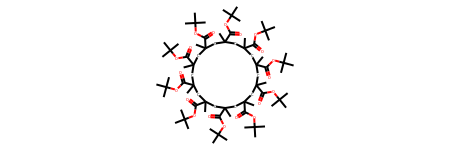

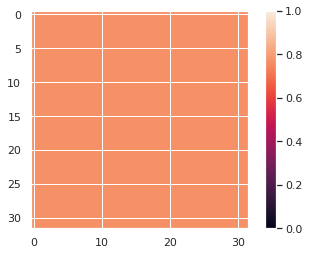

1


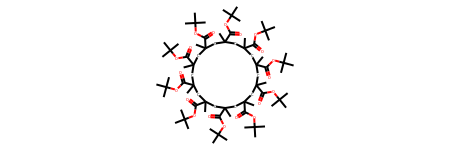

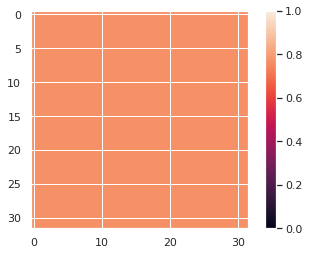

0


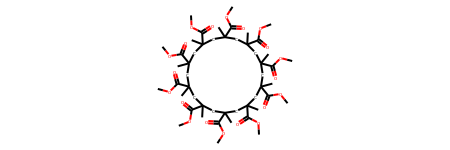

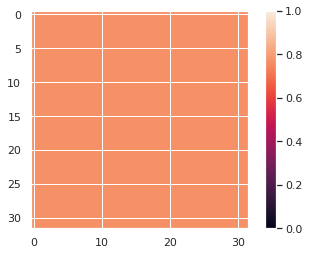

1


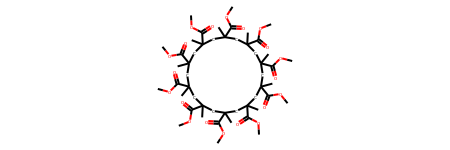

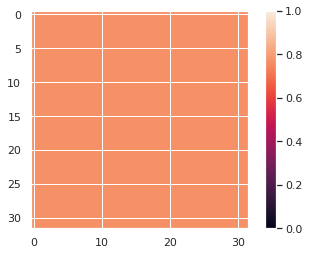

0


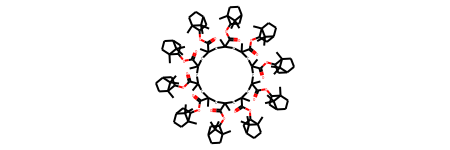

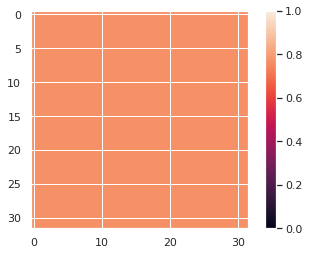

1


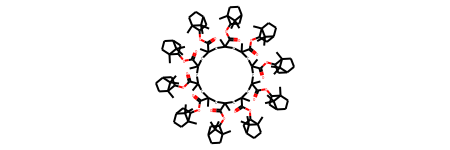

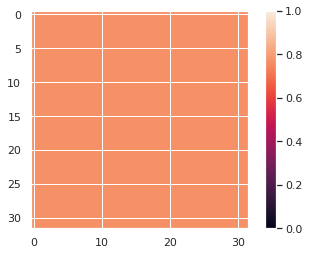

0


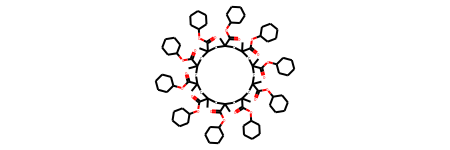

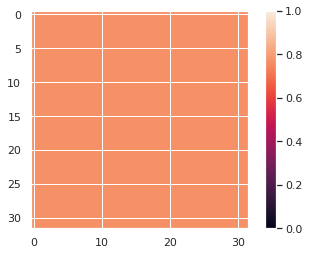

1


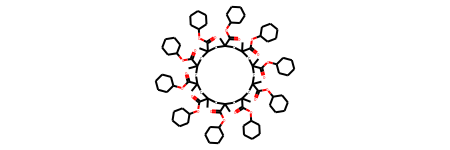

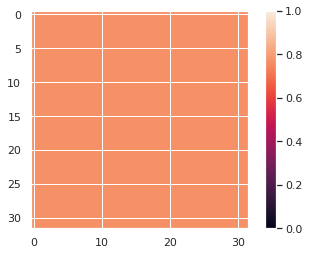

0


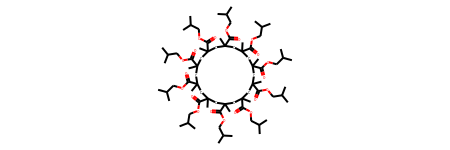

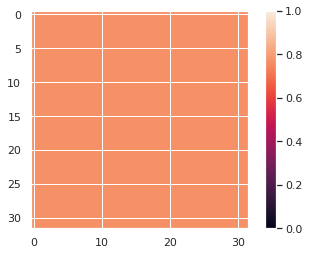

1


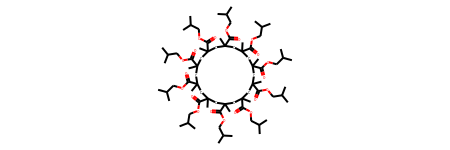

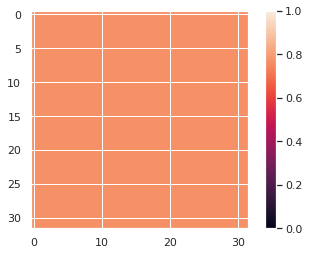

0


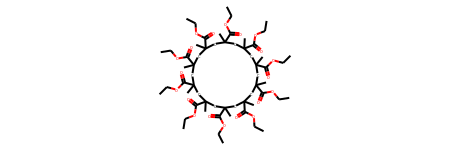

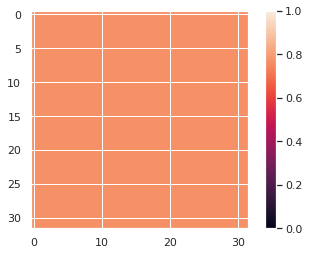

1


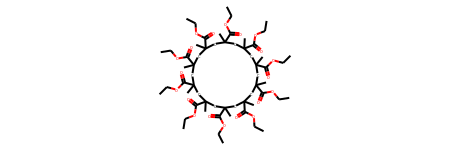

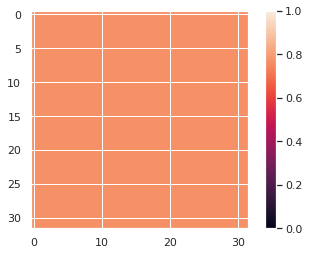

0


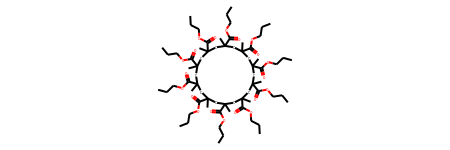

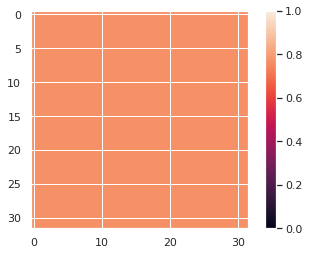

1


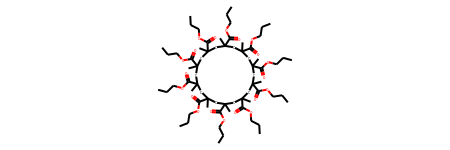

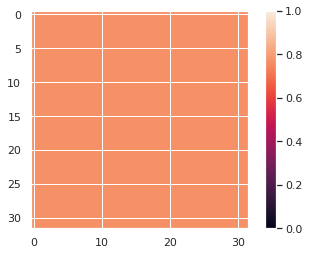

0


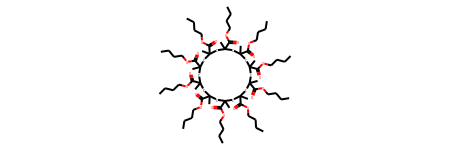

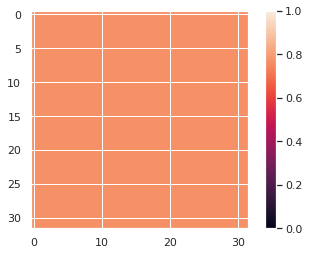

1


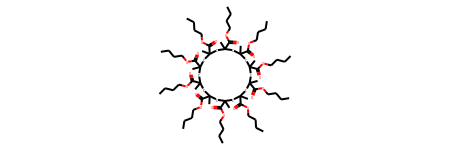

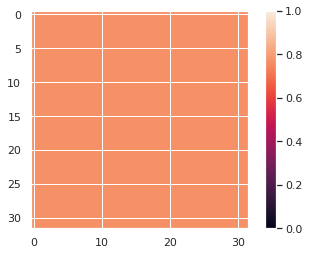

0


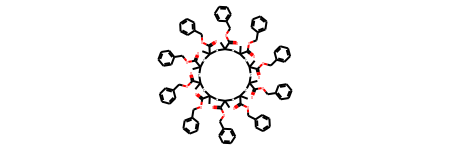

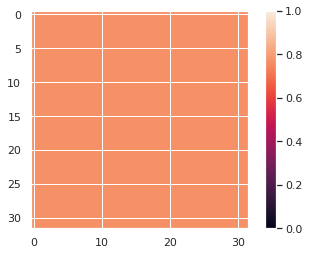

1


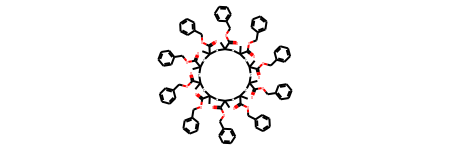

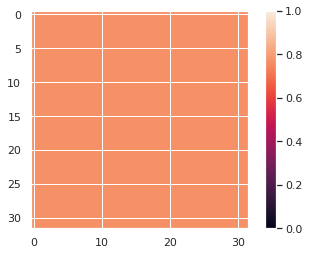

0


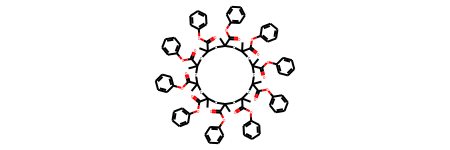

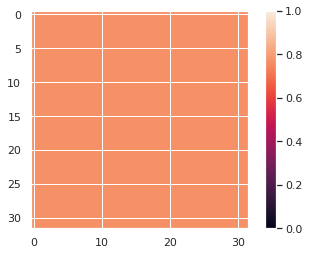

1


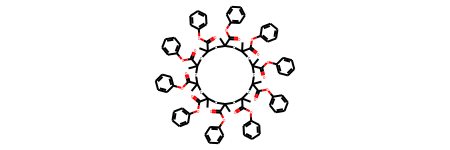

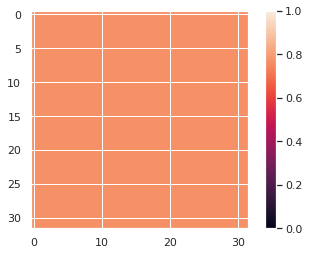

In [65]:
z_max=train_df["z_average"].max()
z_max=600
z_min=train_df["z_average"].min()
for (smiles,with_pva), smiles_df in pred_df.groupby(["circular_smiles_10","with_pva"]):
    predicted_z_average = smiles_df["predicted_roll_valid"].values.astype(float)
    #print(predicted_z_average)
    XY_pred = (predicted_z_average.reshape(len(concentrations),-1)).T
    plt.imshow(XY_pred,
                    #extent=[c_min,c_max,30,0],
         #            yticklabels=yticks
                    )
    plt.clim(0,1) 
    
    sd = train_df[(train_df["circular_smiles_10"]==smiles)]
    sd = sd[sd["with_pva"]==with_pva]
    #dps=[]
    #poly_conc=[]
    #z_average=[]
    #for (dp,polymer_concentration), point_group in sd.groupby(["dp","polymer_concentration"]):
    #    dps.append(dp)
    #    poly_conc.append(polymer_concentration)
    #    z_average.append(point_group["z_average"].mean())
    #new_dps=[np.argmin(np.abs(poly_deg-deg)) for deg in dps]
    #new_conc=[np.argmin(np.abs(concentrations-conc)) for conc in poly_conc]
    #plt.scatter(new_conc,new_dps,c=z_average,edgecolors="w")
    #plt.clim(0,z_max) 
    
    print(with_pva)
    display(Chem.MolFromSmiles(smiles))
    
    plt.colorbar()
    plt.show()
    plt.close()
    
    #xypred = prednp.reshape((d_res,c_res))

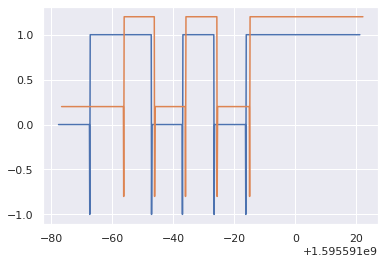

In [171]:
import json
import numpy as np
s='{"count":44,"next":null,"previous":null,"results":[{"time":"1595591021.162672","value":1.0,"table":"position_valve2","pack":null,"name":null,"idx":null},{"time":"1595591021.162421","value":1.0,"table":"position_valve1","pack":null,"name":null,"idx":null},{"time":"1595591001.065207","value":1.0,"table":"position_valve2","pack":null,"name":null,"idx":null},{"time":"1595591001.064932","value":1.0,"table":"position_valve1","pack":null,"name":null,"idx":null},{"time":"1595590984.193194","value":1.0,"table":"position_valve2","pack":null,"name":null,"idx":null},{"time":"1595590984.041099","value":-1.0,"table":"position_valve2","pack":null,"name":null,"idx":null},{"time":"1595590983.940465","value":0.0,"table":"position_valve2","pack":null,"name":null,"idx":null},{"time":"1595590983.938906","value":1.0,"table":"position_valve1","pack":null,"name":null,"idx":null},{"time":"1595590983.787240","value":-1.0,"table":"position_valve1","pack":null,"name":null,"idx":null},{"time":"1595590983.686665","value":0.0,"table":"position_valve1","pack":null,"name":null,"idx":null},{"time":"1595590980.988015","value":0.0,"table":"position_valve2","pack":null,"name":null,"idx":null},{"time":"1595590980.987768","value":0.0,"table":"position_valve1","pack":null,"name":null,"idx":null},{"time":"1595590973.563397","value":0.0,"table":"position_valve1","pack":null,"name":null,"idx":null},{"time":"1595590973.563168","value":0.0,"table":"position_valve2","pack":null,"name":null,"idx":null},{"time":"1595590973.410651","value":-1.0,"table":"position_valve1","pack":null,"name":null,"idx":null},{"time":"1595590973.410253","value":-1.0,"table":"position_valve2","pack":null,"name":null,"idx":null},{"time":"1595590973.310251","value":1.0,"table":"position_valve1","pack":null,"name":null,"idx":null},{"time":"1595590973.309655","value":1.0,"table":"position_valve2","pack":null,"name":null,"idx":null},{"time":"1595590963.185982","value":1.0,"table":"position_valve2","pack":null,"name":null,"idx":null},{"time":"1595590963.184447","value":1.0,"table":"position_valve1","pack":null,"name":null,"idx":null},{"time":"1595590963.032966","value":-1.0,"table":"position_valve2","pack":null,"name":null,"idx":null},{"time":"1595590963.032332","value":-1.0,"table":"position_valve1","pack":null,"name":null,"idx":null},{"time":"1595590962.932468","value":0.0,"table":"position_valve2","pack":null,"name":null,"idx":null},{"time":"1595590962.931907","value":0.0,"table":"position_valve1","pack":null,"name":null,"idx":null},{"time":"1595590960.935419","value":0.0,"table":"position_valve2","pack":null,"name":null,"idx":null},{"time":"1595590960.935175","value":0.0,"table":"position_valve1","pack":null,"name":null,"idx":null},{"time":"1595590953.060736","value":0.0,"table":"position_valve2","pack":null,"name":null,"idx":null},{"time":"1595590953.059682","value":0.0,"table":"position_valve1","pack":null,"name":null,"idx":null},{"time":"1595590952.907889","value":-1.0,"table":"position_valve2","pack":null,"name":null,"idx":null},{"time":"1595590952.906954","value":-1.0,"table":"position_valve1","pack":null,"name":null,"idx":null},{"time":"1595590952.807289","value":1.0,"table":"position_valve2","pack":null,"name":null,"idx":null},{"time":"1595590952.806412","value":1.0,"table":"position_valve1","pack":null,"name":null,"idx":null},{"time":"1595590942.936748","value":1.0,"table":"position_valve2","pack":null,"name":null,"idx":null},{"time":"1595590942.784249","value":-1.0,"table":"position_valve2","pack":null,"name":null,"idx":null},{"time":"1595590942.683692","value":0.0,"table":"position_valve2","pack":null,"name":null,"idx":null},{"time":"1595590940.913621","value":0.0,"table":"position_valve2","pack":null,"name":null,"idx":null},{"time":"1595590940.913379","value":1.0,"table":"position_valve1","pack":null,"name":null,"idx":null},{"time":"1595590932.813219","value":1.0,"table":"position_valve1","pack":null,"name":null,"idx":null},{"time":"1595590932.660349","value":-1.0,"table":"position_valve1","pack":null,"name":null,"idx":null},{"time":"1595590932.559873","value":0.0,"table":"position_valve1","pack":null,"name":null,"idx":null},{"time":"1595590922.436258","value":0.0,"table":"position_valve2","pack":null,"name":null,"idx":null},{"time":"1595590922.436020","value":0.0,"table":"position_valve2","pack":null,"name":null,"idx":null},{"time":"1595590922.434514","value":0.0,"table":"position_valve1","pack":null,"name":null,"idx":null},{"time":"1595590922.434219","value":0.0,"table":"position_valve1","pack":null,"name":null,"idx":null}]}'

data=json.loads(s)

ts=[]
for d in data['results']:
    ts.append(float(d['time']))
    
ts=np.array(list(sorted(list(set(ts)))))

v1=np.zeros_like(ts)
v1[:]=np.nan
v2=np.zeros_like(ts)
v2[:]=np.nan

for d in data['results']:
    t=float(d['time'])
    tix=np.argmin(np.abs(ts-t))
    if d["table"] == 'position_valve2':
        v2[tix]=int(d['value'])
    if d["table"] == 'position_valve1':
        v1[tix]=int(d['value'])
        
plt.plot(ts[~np.isnan(v1)],v1[~np.isnan(v1)])
plt.plot(ts[~np.isnan(v2)]+1,v2[~np.isnan(v2)]+0.2)

In [165]:
dt=ts[1:]-ts[:-1]
dt.max()/60

38.77131460110346

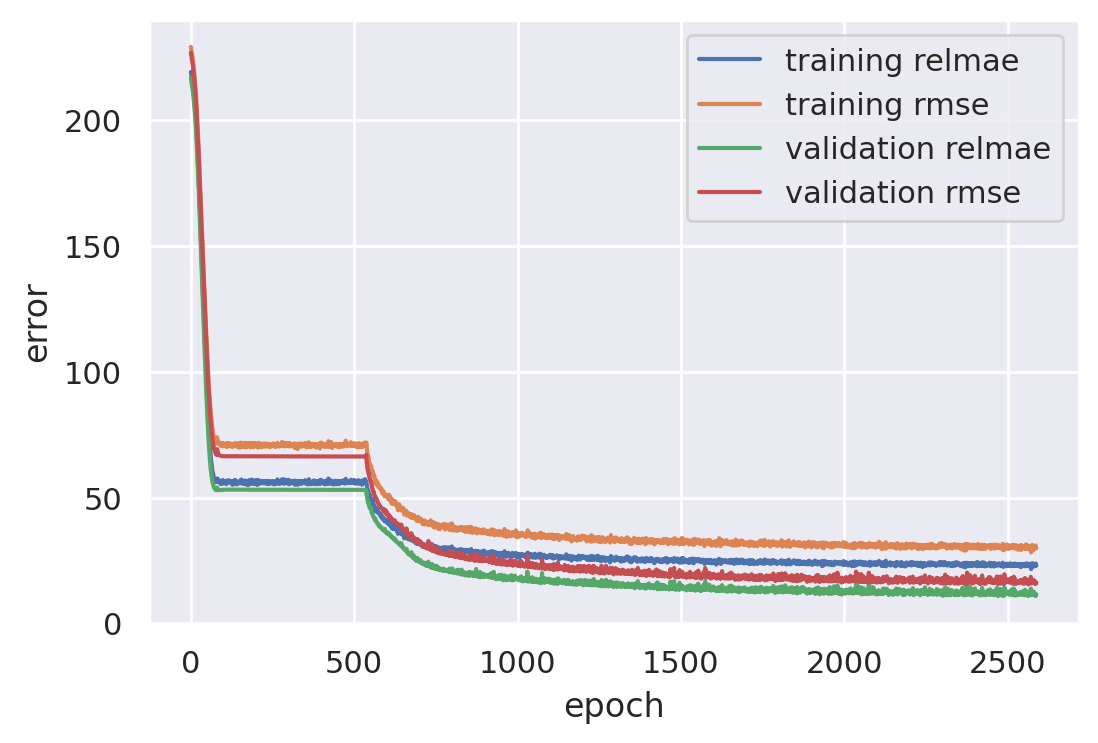

In [122]:
import pickle
td = pickle.load(open("/home/julian/.smartchem/np_model_1596610350/training/training_metrics.mtr", "rb"))
from_epoch=0
steps=[]
epochs=[]
metrics=[]
for step, data in td.items():
    if step == "epochs":
        continue
    steps.append(step)
    for epoch, dmetrics in data.items():
        if epoch not in epochs:
            epochs.append(epoch)
        for metric,mdata in dmetrics.items():
            if metric not in metrics:
                metrics.append(metric)
steps.remove('testing')

epochs=np.sort(epochs)
data=np.zeros((len(steps),len(metrics),len(epochs)))*np.nan
plt.figure(dpi=200)
for i,step in enumerate(steps):
    for j,metric in enumerate(metrics):
        for k,epoch in enumerate(epochs):
            try:
                data[i,j,k] = td[step][epoch][metric]
            except KeyError:
                pass
        plt.plot(epochs[from_epoch:],data[i,j,from_epoch:],label=step+" "+metric)
plt.xlabel("epoch")
plt.ylabel("error")
plt.legend()

In [45]:
import pickle
td = pickle.load(open("/home/julian/.smartchem/np_model_1596610350/training/training_metrics.mtr", "rb"))

from_epoch=0
to_epoch=2600
steps=[]
epochs=[]
metrics=[]
for step, data in td.items():
    if step == "epochs":
        continue
    steps.append(step)
    for epoch, dmetrics in data.items():
        if epoch not in epochs:
            epochs.append(epoch)
        for metric,mdata in dmetrics.items():
            if metric not in metrics:
                metrics.append(metric)

epochs=np.sort(epochs)
data=np.zeros((len(steps),len(metrics),len(epochs)))*np.nan

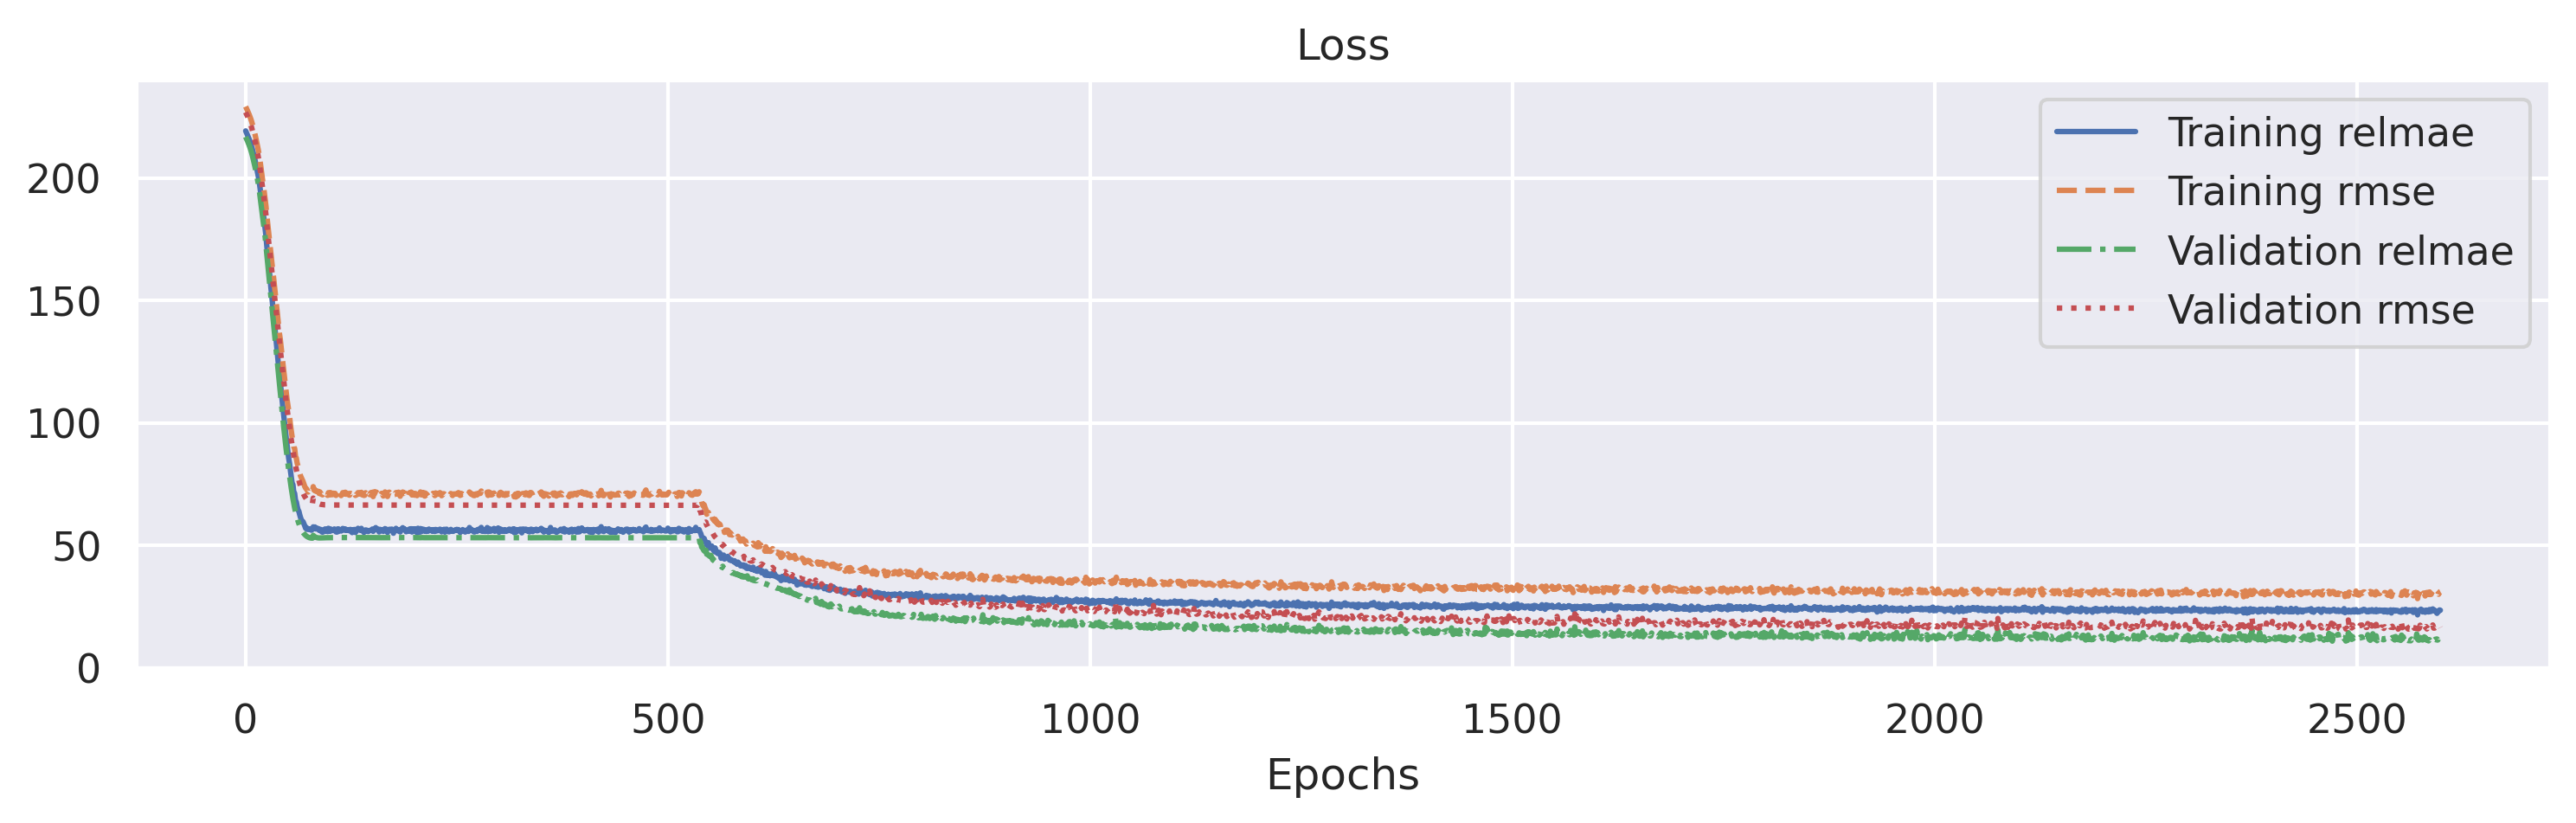

In [87]:
plt.figure(dpi=300,figsize=(12,3))
steps=[s for s in steps if s in ["training","validation"]]
b=iter(["-","--",'-.',':'])
for i,step in enumerate(steps):
    for j,metric in enumerate(metrics):
        for k,epoch in enumerate(epochs):
            try:
                data[i,j,k] = td[step][epoch][metric]
            except KeyError:
                pass
        plt.plot(epochs[from_epoch:to_epoch],data[i,j,from_epoch:to_epoch],next(b),label=step.capitalize()+" "+metric)
#plt.tight_layout()
plt.xlabel("Epochs")
plt.title("Loss")
plt.legend()

In [91]:
stat_df = test_df.groupby(["dp","additive","polymer_concentration"]).describe()['z_average']

In [92]:
stat_df["var"] = stat_df["std"]**2



stat_df["coeff_of_var"] = stat_df['std']/stat_df['mean']
stat_df["coeff_of_var_star"] = stat_df["coeff_of_var"]*(1+1/(4*stat_df["count"]))

stat_df["std_error"] = stat_df["std"]/np.sqrt(stat_df["count"])
stat_df["rel_std_error"] = stat_df["std_error"]/stat_df['mean']


stat_df_res = stat_df.reset_index()

In [97]:
100*(stat_df_res["coeff_of_var_star"].mean())

3.71890466554715